In [1]:
import pandas
import numpy as np
from metrics import Metrics
from sklearn import metrics
import glob
import collections
import os
import json
from matplotlib import pyplot

In [2]:
subreddits = ['en', 'es', 'gl', 'fr', 'ca', 'de', 'it', 'pt', 'eu']

def MakePredictions(filename):
    df = pandas.read_csv(filename, index_col=0)
    
    df[subreddits] = df[subreddits].sub(df[subreddits].mean(axis=1), axis=0)
            
    ss = np.array(subreddits)
    df['pred'] = ss[np.argmin(df[subreddits].values, axis=1)]

    return df

In [3]:
def GetPPL(filename):
    dirname = os.path.dirname(filename)
    pplfile = os.path.join(dirname, 'ppl.txt')
    if os.path.exists(pplfile):
        with open(pplfile, 'r') as f:
          lines = f.readlines()
        if len(lines):
            ppl = lines[-1].split()[-1]
            return ppl
    return None

In [4]:
def GetParams(filename):
    dirname = os.path.dirname(filename)
    paramsfile = os.path.join(dirname, 'params.json')
    with open(paramsfile, 'r') as g:
        params = json.load(g)
    return params

In [5]:
dataframes = {}
for filename in glob.glob('exps/ctw*/classify.csv'):
    dataframes[filename] = MakePredictions(filename)

In [6]:
def GetAuc(sub, df):
    fpr, tpr, thresholds = metrics.roc_curve(df.label == sub, -df[sub])
    return metrics.auc(fpr, tpr)

def PlotAuc(sub, df):
    fpr, tpr, thresholds = metrics.roc_curve(df.label == sub, -df[sub])
    pyplot.plot(fpr, tpr)

In [39]:
results = []
for filename in dataframes:
    row = {'model': filename}
    df = dataframes[filename]
    for sub in subreddits:
        row[sub] = GetAuc(sub, df)
    f1, acc = Metrics(list(df.pred.values), list(df.label.values), show=False)
    row['f1'] = f1
    row['acc'] = acc
    row['ppl'] = GetPPL(filename)
    
    params = GetParams(filename)
    row['hash'] = int(params['use_hash_table'])
    row['hyper'] = int(params['use_hyper_adaptation'])
    row['mikolov'] = int(params['use_mikolov_adaptation'])
    row['softmax'] = int(params['use_softmax_adaptation'])
    
    results.append(row)
results = pandas.DataFrame(results)
results['avg'] = results[subreddits].mean(axis=1)
results[results.model.apply(len) < 27].sort_values('ppl')[['acc', 'f1', 'avg', 'ppl', 'model',
                          'hyper', 'mikolov', 'softmax', 'hash']]

,acc,f1,avg,ppl,model,hyper,mikolov,softmax,hash
10,0.927929,85.199503,0.958145,6.151,exps/ctweet13/classify.csv,0,1,1,1
19,0.913643,82.860269,0.949153,6.206,exps/ctweet12/classify.csv,0,1,1,0
9,0.916071,84.157587,0.949706,6.232,exps/ctweet4/classify.csv,0,1,0,0
12,0.924571,84.410108,0.951286,6.245,exps/ctweet5/classify.csv,0,1,0,1
23,0.925286,84.745894,0.955819,6.276,exps/ctweet6/classify.csv,1,1,0,0
1,0.932286,85.135814,0.961024,6.280,exps/ctweet10/classify.csv,1,0,1,0
11,0.936571,86.263831,0.961509,6.296,exps/ctweet7/classify.csv,1,1,0,1
3,0.936929,86.104743,0.961689,6.313,exps/ctweet11/classify.csv,1,0,1,1
6,0.570071,44.517209,0.861810,6.343,exps/ctweet9/classify.csv,0,0,1,1
18,0.928857,85.157106,0.957019,6.352,exps/ctweet15/classify.csv,1,1,1,1


In [37]:
df = dataframes['exps/ctweet14/classify.csv']
Metrics(list(df.pred.values), list(df.label.values));

accuracy = 0.942
 Lang     Prec.   Rec.   F1
------------------------------
  ca       85.11  95.86  90.17
  de       92.50  94.87  93.67
  en       97.76  98.12  97.94
  es       96.21  94.50  95.35
  eu       86.03  88.51  87.25
  fr       92.36  87.97  90.11
  gl       30.71  63.59  41.42
  it       83.26  89.15  86.10
  pt       97.30  91.63  94.38
------------------------------
  Total:   84.58  89.36  86.27


In [38]:
df = dataframes['exps/ctweet2/classify.csv']
Metrics(list(df.pred.values), list(df.label.values));

accuracy = 0.939
 Lang     Prec.   Rec.   F1
------------------------------
  ca       93.56  91.72  92.63
  de       90.69  94.87  92.73
  en       97.78  97.96  97.87
  es       95.54  94.62  95.08
  eu       82.90  91.95  87.19
  fr       91.49  86.71  89.03
  gl       28.65  58.70  38.50
  it       79.57  88.21  83.67
  pt       96.48  91.66  94.01
------------------------------
  Total:   84.07  88.49  85.63


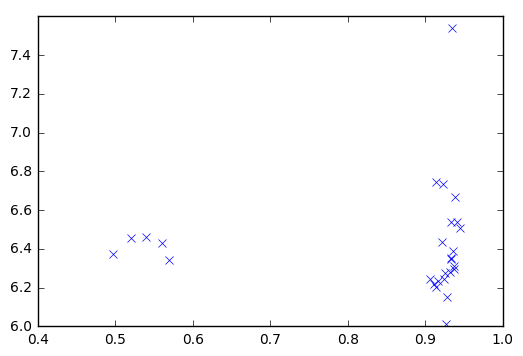

In [400]:
pyplot.plot(results.acc, results.ppl, 'x')
pyplot.show()

NameError: name 'pt' is not defined

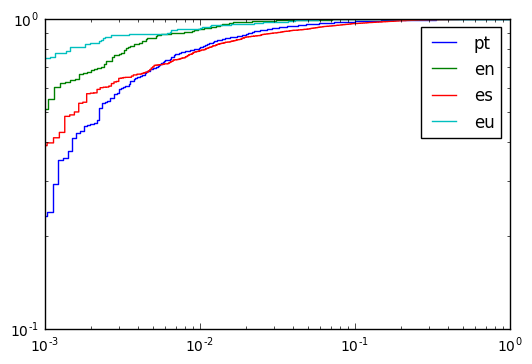

In [35]:
sub = 'pt'
fpr, tpr, thresholds = metrics.roc_curve(df.label == sub, -df[sub])
pyplot.plot(fpr, tpr)
sub = 'en'
fpr, tpr, thresholds = metrics.roc_curve(df.label == sub, -df[sub])
pyplot.plot(fpr, tpr)

sub = 'es'
fpr, tpr, thresholds = metrics.roc_curve(df.label == sub, -df[sub])
pyplot.plot(fpr, tpr)

sub = 'eu'
fpr, tpr, thresholds = metrics.roc_curve(df.label == sub, -df[sub])
pyplot.plot(fpr, tpr)

pyplot.legend(['pt', 'en', 'es', 'eu'])

pyplot.semilogy()
pyplot.semilogx()
pyplot.xlim([0.001, 1.0])
pyplot.ylim([0.1, 1.0])
pyplot.show()

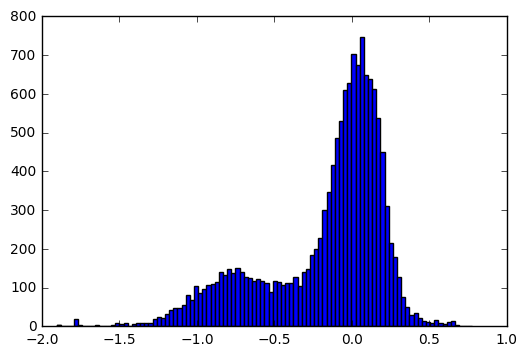

In [21]:
pyplot.hist(df['pt'], bins=100)
pyplot.show()